In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def logistic(r,x):
    return r*x*(1-x)

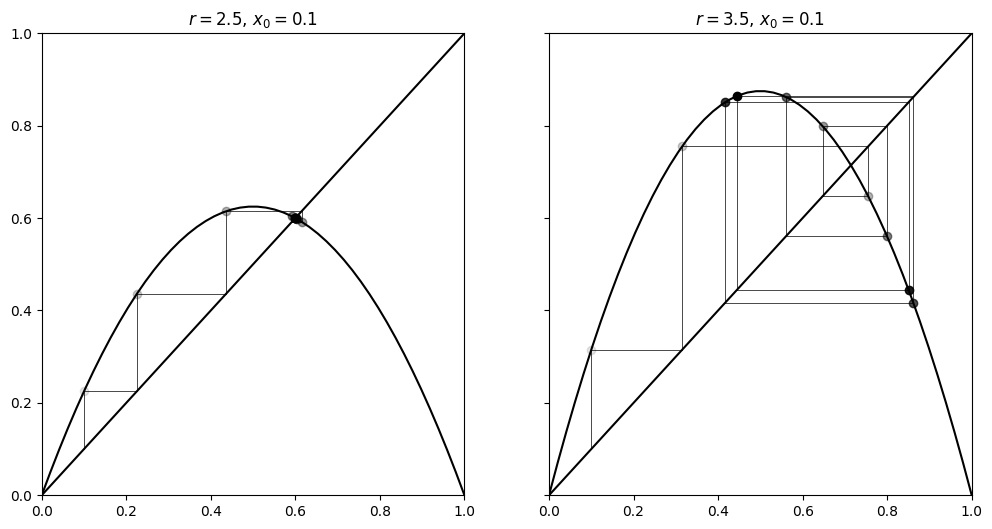

In [3]:
## Plot Return Map with Cobweb
def plot_system(r, x0, n, ax=None):
    # Plot function and y=x diag. line
    t = np.linspace(0,1)
    ax.plot(t, logistic(r,t), 'k') # curve
    ax.plot([0,1],[0,1], 'k') # line
    values=[]

    # Recursively apply y=f(x). <-equal to-> x_n+1 = f(x_n)
    # (x,x) -> (x,y) from line to curve
    # (x,y) -> (y,y) from curve to line to set x_n = x_n+1
    x=x0
    for i in range(n):
        y = logistic(r, x)

        # plot transient path lines
        ax.plot([x,x], [x,y], 'k', linewidth=0.5)
        ax.plot([x,y], [y,y], 'k', linewidth=0.5)

        # plot points of intersection
        ax.plot([x],[y],'ok', alpha=(i+1)/n)
        
        # set x_n = x_n+1
        x=y
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$") 


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)
plt.show()



4.7532931351913295 4.222318743735337 8.58905682035649


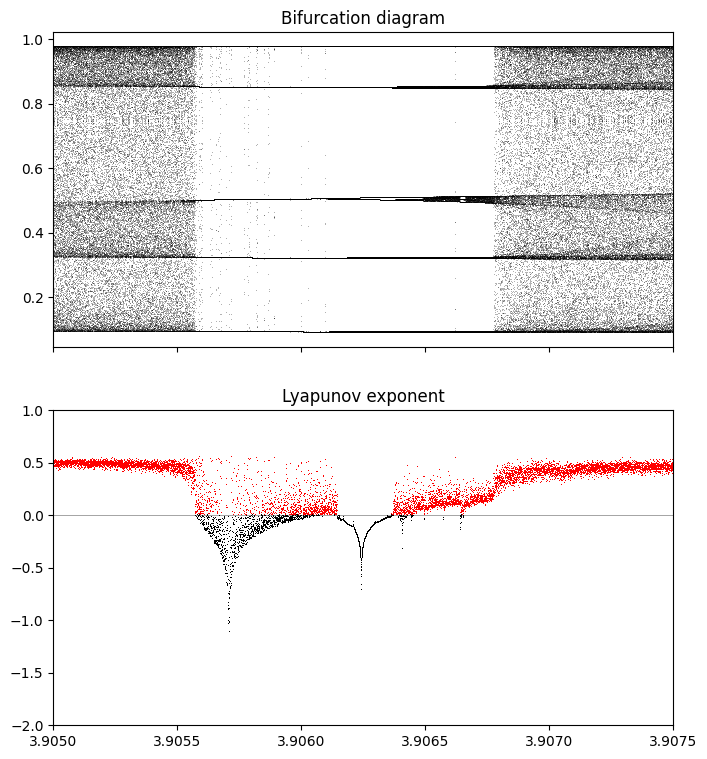

: 

In [36]:
## Select and initialize values for Bifurcation Plot ##
rmin=3.9050
rmax=3.9075
n=10000 #values of r to simulate

r = np.linspace(rmin, rmax, n) # build r array

iterations = 500 # how many iterates 
k = 20 # plot points for last k iterations

x0 = 1e-5*np.ones(n)
x0=np.linspace(0.4,0.6,n)
lyapunov = np.zeros(n)


## plot bifurcation and lyapunov diagrams ##
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9), sharex=True)
x = x0

trace = []
# bifurcation
for i in range(iterations):
    x=logistic(r, x)
    trace.append(x)
    lyapunov += np.log(abs(r - 2 * r * x))

    # plot final points to see asymptomatic behavior
    if i >= iterations-k: 
        ax1.plot(r, x ,',k', alpha=0.3, ms=.1)

trace=np.array(trace, dtype=float)
trace=trace.T
trace=trace[:,-16:]
diff = []
""" for i in range(n):
    temp=[]
    for j in range(15):
        temp.append(np.round(np.abs(trace[i][j+1]-trace[i][j]),6))
        #print(f"{temp[j]:.4f}", end=' ')
        
    #print()
    diff.append(temp) """
    
feigenbaum=[]

ax1.set_xlim(rmin, rmax)
ax1.set_title("Bifurcation diagram")

ax2.axhline(0,color='k', linewidth=0.5, alpha=0.5)
""" for i in range(len(r[lyapunov>=-0.1])):
    print(f"{np.round(r[lyapunov>=-0.1][i],6)}  {np.round(lyapunov[lyapunov>=-0.1][i],6)}") """

ax2.plot(r[lyapunov<0], (lyapunov[lyapunov<0]/iterations), ',k')
ax2.plot(r[lyapunov>=0], (lyapunov[lyapunov>=0]/iterations), ',r')
ax2.set_xlim(rmin, rmax)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
#plt.tight_layout()
b1=(3.001247+2.995485)/2
b2=(3.450326+3.447445)/2
b3=(3.544671+3.542661)/2
b4=(3.568392+3.563835)/2
b5=(3.568995+3.568459)/2
f = (b2-b1)/(b3-b2)
f1 = (b3-b2)/(b4-b3)
f2 = (b4-b3)/(b5-b4)
print(f"{f} {f1} {f2}")
plt.show()

In [5]:
def detect_bifurcations(r_values, x0=0.1, num_iterations=1000, num_transient=100):
    bifurcation_points = []
    for r in r_values:
        x = x0
        for _ in range(num_transient):
            x = logistic(r, x)
        x_previous = logistic(r, x)
        for _ in range(num_iterations - 1):
            x = logistic(r, x)
            if abs(x - x_previous) < 1e-6:  # Check for stability
                if x > 0:
                    bifurcation_points.append(r)
                break
            x_previous = x
    return bifurcation_points

# Define the range of r values to explore
r_values = np.linspace(1, 4, 10000)

# Get the r values where period-doubling bifurcations occur
bifurcation_r_values = detect_bifurcations(r_values)

print("Values of r where period-doubling bifurcations occur:")
print(bifurcation_r_values)

Values of r where period-doubling bifurcations occur:
[1.0, 1.0003000300030003, 1.0006000600060005, 1.0009000900090008, 1.001200120012001, 1.0015001500150016, 1.0018001800180019, 1.0021002100210021, 1.0024002400240024, 1.0027002700270027, 1.003000300030003, 1.0033003300330032, 1.0036003600360035, 1.003900390039004, 1.0042004200420043, 1.0045004500450045, 1.0048004800480048, 1.005100510051005, 1.0054005400540054, 1.0057005700570056, 1.006000600060006, 1.0063006300630064, 1.0066006600660067, 1.006900690069007, 1.0072007200720072, 1.0075007500750075, 1.0078007800780078, 1.008100810081008, 1.0084008400840083, 1.0087008700870086, 1.009000900090009, 1.0093009300930094, 1.0096009600960096, 1.00990099009901, 1.0102010201020102, 1.0105010501050105, 1.0108010801080107, 1.011101110111011, 1.0114011401140115, 1.0117011701170118, 1.012001200120012, 1.0123012301230123, 1.0126012601260126, 1.0129012901290129, 1.0132013201320131, 1.0135013501350134, 1.013801380138014, 1.0141014101410142, 1.01440144014

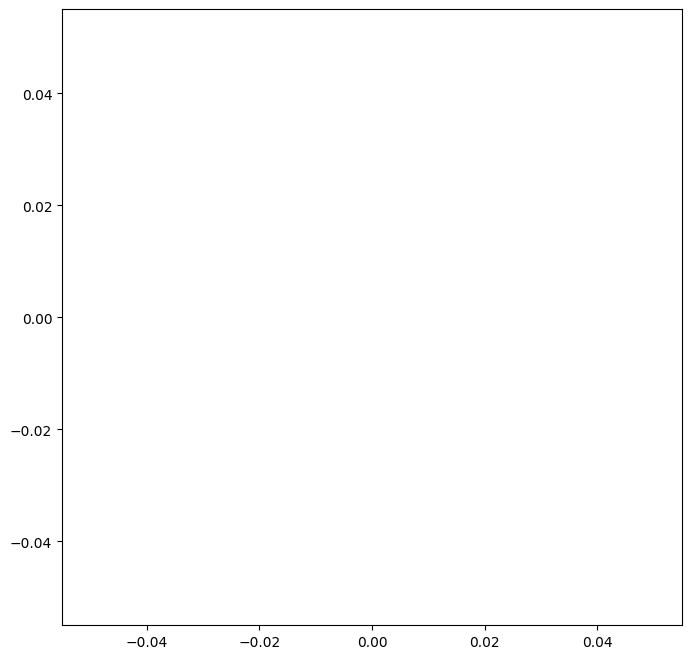

In [6]:
fig,ax=plt.subplots(figsize=(8,8))

ax.plot(np.arange(len(feigenbaum)), feigenbaum, ',k')